In [1]:
import turicreate as tc

## load

In [2]:
image_train=tc.SFrame('image_train_data/')

In [3]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


## train knn using deep features

In [4]:
knn_model=tc.nearest_neighbors.create(image_train,features=['deep_features']
                                     ,label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

### applying similarity

In [5]:
cat=image_train[18:19]
cat

id,image,label,deep_features,image_array
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."


In [6]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.487ms      |

| Done         |         | 100         | 193.44ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [7]:
def get_images_from_id(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.42ms       |

| Done         |         | 100         | 191.177ms    |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,384,,cat,"[1.0440353155136108, 0.0, 0.0, 0.0, 0.0, 0.0, 9.495406150817871, 0.0, 0.0, 0.0, 0.0, 0.0, 1.015682339668274, 0.654792070388794, 0.0, 0.3271738886833191, 0.0, 0.0, 0.0, 1.240085482597351, 0.0, 2.6598682403564453, 0.0, 0.0, 0.0, 0.16509848833084106, 0.0, 0.6701491475105286, 0.0, 0.0, 0.0, 0.0, 0.417128324508667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8625438213348389, 0.0, 0.47617536783218384, 1.9455668926239014, 0.0, 0.0, 0.6290905475616455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6789456605911255, 0.0, 0.1041874885559082, 4.074601173400879, 0.0, 0.0, 0.0, 0.08778756856918335, 0.0, 0.35365527868270874, 0.0, 0.0, 0.23898005485534668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9145865440368652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[46.0, 45.0, 50.0, 47.0, 45.0, 51.0, 45.0, 44.0, 49.0, 41.0, 40.0, 45.0, 35.0, 34.0, 39.0, 28.0, 27.0, 32.0, 22.0, 21.0, 25.0, 16.0, 15.0, 18.0, 12.0, 12.0, 14.0, 12.0, 11.0, 14.0, 10.0, 10.0, 13.0, 8.0, 8.0, 10.0, 5.0, 5.0, 7.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 6.0, 4.0, 3.0, 7.0, 4.0, 3.0, 8.0, 4.0, 3.0, 8.0, 4.0, 3.0, 8.0, 4.0, 3.0, 8.0, 4.0, 3.0, 8.0, 4.0, 3.0, 8.0, 4.0, 3.0, 9.0, 4.0, 3.0, 11.0, 4.0, 3.0, 11.0, 40.0, 39.0, 44.0, 43.0, ...]"
1,6910,,cat,"[1.5547490119934082, 0.0, 0.0, 0.0, 0.0, 0.0, 10.192292213439941, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7935070395469666, 0.0, 0.0, 0.983633279800415, 0.03533750772476196, 0.0, 0.0, 0.5713701248168945, 0.0, 0.1918395757675171, 0.0, 0.0, 0.0, 0.7268734574317932, 0.22811579704284668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14733248949050903, 0.0, 0.0, 0.07514137029647827, 0.0, 0.0, 1.6613574028015137, 0.01919686794281006, 0.0, 0.0, 1.031715989112854, 0.0, 0.4191089868545532, 1.3390674591064453, 0.0, 0.0, 0.1759464144706726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5368458032608032, 0.0, 0.0, 1.518348217010498, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0972967147827148, 0.0, 0.0, 1.2413746118545532, 0.0, 0.0, 0.0, 0.8835700750350952, 0.8703463077545166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5377819538116455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[154.0, 133.0, 92.0, 134.0, 112.0, 75.0, 108.0, 87.0, 53.0, 98.0, 78.0, 45.0, 104.0, 86.0, 51.0, 109.0, 92.0, 57.0, 103.0, 86.0, 54.0, 97.0, 82.0, 53.0, 89.0, 76.0, 47.0, 111.0, 99.0, 70.0, 132.0, 119.0, 88.0, 139.0, 124.0, 90.0, 146.0, 129.0, 94.0, 124.0, 108.0, 75.0, 86.0, 73.0, 44.0, 104.0, 93.0, 68.0, 89.0, 79.0, 56.0, 72.0, 60.0, 37.0, 112.0, 99.0, 73.0, 120.0, 108.0, 75.0, 134.0, 122.0, 89.0, 149.0, 138.0, 107.0, 136.0, 127.0, 99.0, 94.0, 87.0, 61.0, 83.0, 77.0, 53.0, 94.0, 86.0, 60.0, 104.0, 94.0, 64.0, 111.0, 100.0, 71.0, 101.0, 90.0, 61.0, 96.0, 84.0, 57.0, 100.0, 88.0, 61.0, 113.0, 101.0, 75.0, 151.0, 125.0, 76.0, 138.0, ...]"
2,36870,,cat,"[0.24048322439193726, 0.0, 0.0, 0.0, 0.0, 0.0, 9.527539253234863, 0.0, 0.0, 0.0, 0.0, 0.0, 1.560455560684204, 0.3265879154205322, 0.0, 0.08882629871368408, 0.0, 0.0, 0.0, 0.3300185203552246, 0.0, 1.9467215538024902, 0.0, 0.0, 0.0, 0.0, 0.9693056344985962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5245710611343384, 0.0, 0.0, 0.0, 1.3844035863876343, 0.0, 0.189583420753479, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.488465666770935, 0.7520217895507812, 0.28225207328796387, 4.285426616668701, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6248767375946045, 0.0, 0.0, 1.6218507289886475, 0.0, 0.0, 0.0, 1.2505699396133423, 0.0, 0.0, 0.15706175565719604, 0.0, 0.0, 0.0, 0.8263105750083923, 0.0, 0.0, 0.0, 0.0, 1.7561426162719727, 0.7816861867904663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[16.0, 20.0, 19.0, 14.0, 19.0, 17.0, 11.0, 15.0, 14.0, 9.0, 15.0, 13.0, 14.0, 21.0, 20.0, 23.0, 31.0, 31.0, 21.0, 30.0, 31.0, 21.0, 31.0, 33.0, 21.0, 32.0, 35.0, 20.0, 33.0, 36.0, 26.0, 42.0, 46.0, 
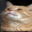
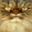
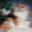
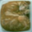
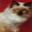

In [15]:
get_images_from_id(knn_model.query(cat)).explore()

,id,image,label,deep_features,image_array
0,136,,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.57378625869751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4727935791015625, 3.1432433128356934, 0.0, 0.0, 1.446069598197937, 0.0, 0.6140477657318115, 0.8344007730484009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8630750179290771, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8941497206687927, 0.0, 0.0, 0.5817651748657227, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9563744068145752, 0.0, 0.0, 2.9371776580810547, 0.0, 0.0, 0.0, 0.1439571976661682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1591334342956543, 0.09369146823883057, 0.0, 3.748291254043579, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1665441989898682, 0.0, 0.0, 4.593391418457031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.641324758529663, 0.016786575317382812, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8513365983963013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[35.0, 59.0, 53.0, 36.0, 56.0, 56.0, 42.0, 62.0, 64.0, 40.0, 59.0, 63.0, 43.0, 60.0, 65.0, 79.0, 103.0, 89.0, 77.0, 104.0, 74.0, 67.0, 88.0, 65.0, 70.0, 93.0, 73.0, 61.0, 82.0, 69.0, 60.0, 80.0, 70.0, 56.0, 74.0, 74.0, 52.0, 69.0, 73.0, 46.0, 67.0, 63.0, 56.0, 77.0, 64.0, 55.0, 75.0, 63.0, 48.0, 68.0, 57.0, 41.0, 61.0, 57.0, 109.0, 132.0, 137.0, 115.0, 140.0, 140.0, 75.0, 101.0, 93.0, 78.0, 102.0, 94.0, 82.0, 103.0, 100.0, 104.0, 126.0, 133.0, 98.0, 125.0, 121.0, 89.0, 116.0, 103.0, 73.0, 99.0, 86.0, 75.0, 98.0, 101.0, 80.0, 100.0, 111.0, 101.0, 131.0, 143.0, 148.0, 186.0, 196.0, 145.0, 179.0, 185.0, 36.0, 59.0, 52.0, 31.0, ...]"

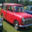

In [14]:
car = image_train[8:9]
car.explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.073ms      |

| Done         |         | 100         | 236.47ms     |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,136,,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.57378625869751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4727935791015625, 3.1432433128356934, 0.0, 0.0, 1.446069598197937, 0.0, 0.6140477657318115, 0.8344007730484009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8630750179290771, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8941497206687927, 0.0, 0.0, 0.5817651748657227, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9563744068145752, 0.0, 0.0, 2.9371776580810547, 0.0, 0.0, 0.0, 0.1439571976661682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1591334342956543, 0.09369146823883057, 0.0, 3.748291254043579, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1665441989898682, 0.0, 0.0, 4.593391418457031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.641324758529663, 0.016786575317382812, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8513365983963013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[35.0, 59.0, 53.0, 36.0, 56.0, 56.0, 42.0, 62.0, 64.0, 40.0, 59.0, 63.0, 43.0, 60.0, 65.0, 79.0, 103.0, 89.0, 77.0, 104.0, 74.0, 67.0, 88.0, 65.0, 70.0, 93.0, 73.0, 61.0, 82.0, 69.0, 60.0, 80.0, 70.0, 56.0, 74.0, 74.0, 52.0, 69.0, 73.0, 46.0, 67.0, 63.0, 56.0, 77.0, 64.0, 55.0, 75.0, 63.0, 48.0, 68.0, 57.0, 41.0, 61.0, 57.0, 109.0, 132.0, 137.0, 115.0, 140.0, 140.0, 75.0, 101.0, 93.0, 78.0, 102.0, 94.0, 82.0, 103.0, 100.0, 104.0, 126.0, 133.0, 98.0, 125.0, 121.0, 89.0, 116.0, 103.0, 73.0, 99.0, 86.0, 75.0, 98.0, 101.0, 80.0, 100.0, 111.0, 101.0, 131.0, 143.0, 148.0, 186.0, 196.0, 145.0, 179.0, 185.0, 36.0, 59.0, 52.0, 31.0, ...]"
1,8977,,automobile,"[0.0, 0.0, 0.0, 0.1361560821533203, 0.0, 0.0, 6.814979553222656, 0.0, 0.0, 0.0, 0.0, 0.0, 0.43722760677337646, 0.0, 0.5315119028091431, 0.36427992582321167, 0.6908599138259888, 0.0, 0.0, 1.770264983177185, 0.0, 0.0800466537475586, 0.09451496601104736, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42600566148757935, 0.0, 0.0, 1.4244740009307861, 0.0, 0.0, 0.0, 0.0, 0.0, 2.709169387817383, 0.0, 0.0, 3.002518653869629, 0.0, 0.7693667411804199, 0.0, 0.9912864565849304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020935535430908203, 0.0, 2.8974344730377197, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03230935335159302, 0.0, 0.0, 3.2637791633605957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9890598654747009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19713282585144043, 0.19438600540161133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[186.0, 195.0, 199.0, 182.0, 192.0, 198.0, 184.0, 196.0, 203.0, 178.0, 190.0, 189.0, 191.0, 199.0, 201.0, 200.0, 202.0, 207.0, 198.0, 203.0, 210.0, 189.0, 199.0, 206.0, 188.0, 197.0, 206.0, 190.0, 199.0, 209.0, 195.0, 199.0, 211.0, 201.0, 203.0, 212.0, 210.0, 211.0, 219.0, 208.0, 210.0, 220.0, 209.0, 213.0, 218.0, 203.0, 209.0, 215.0, 199.0, 208.0, 214.0, 200.0, 211.0, 218.0, 192.0, 206.0, 216.0, 193.0, 204.0, 215.0, 208.0, 212.0, 219.0, 209.0, 210.0, 214.0, 205.0, 207.0, 216.0, 184.0, 198.0, 211.0, 179.0, 193.0, 208.0, 180.0, 190.0, 203.0, 174.0, 191.0, 203.0, 176.0, 187.0, 205.0, 168.0, 185.0, 203.0, 165.0, 187.0, 202.0, 168.0, 186.0, 201.0, 172.0, 187.0, 201.0, 98.0, 111.0, 101.0, 100.0, ...]"
2,24146,,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.216635704040527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2919350862503052, 0.0, 0.0, 0.25897639989852905, 2.5225658416748047, 0.0, 0.0, 0.2576272487640381, 0.0, 0.291958749294281, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.692221164703369, 0.0, 0.0, 1.4501246213912964, 0.0, 0.0, 0.47208452224731445, 0.0, 0.0, 3.454415798187256, 0.0, 0.0, 2.528709650039673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12776196002960205, 0.0, 0.0, 1.3999775648117065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4191403388977051, 0.26016396284103394, 0.0, 3.7897422313690186, 0.0, 0.0, 0.0, 1.5608348846435547, 0.0, 0.0, 0.0, 0.9829225540161133, 0.20505398511886597, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.597538411617279, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[229.0, 231.0, 227.0, 232.0, 235.0, 231.0, 231.0, 235.0, 230.0, 233.0, 237.0, 231.0, 232.0, 236.0, 
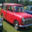
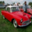
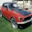
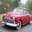
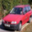

In [16]:
get_images_from_id(knn_model.query(car)).explore()

### funny lambda

In [23]:
show_neighbors= lambda i: get_images_from_id(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.738ms     |

| Done         |         | 100         | 208.402ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

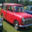
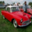
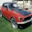
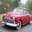
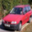

In [24]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 14.804ms     |

| Done         |         | 100         | 225.344ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

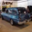
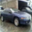
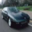
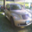
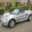

In [26]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.204ms      |

| Done         |         | 100         | 225.893ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

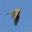
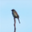
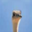
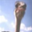
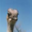

In [27]:
show_neighbors(1222)